### `PROJECT TITLE :- ` 
    --> Classification of Iris Species Using Machine Learning Techniques
### `DOMAIN INFORMATION :-` 
    --> Botanical Classification using Supervised Machine Learning.

### `BUSINESS PROBLEMS :-`
    --> Predict the species of iris flowers using machine learning models based on various features such as sepal length, sepal width, petal length, and petal width. The goal is to build a model that accurately classifies iris flowers into one of three species: Iris setosa, Iris versicolor, and Iris virginica. This can aid botanists, researchers, and horticulturists in automating the classification process and conducting further research.
    
### `OBJECTIVE :-` 
    --> Develop machine learning models to classify iris species accurately, providing valuable insights and tools for botanical research and education.


### `IMPORTING REQUIRED LIBRARIES`

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,precision_score,f1_score,recall_score,confusion_matrix

from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
import joblib
import os


### `IMPORTING DATASET`

In [31]:
df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### `SHAPE OF DATASET`

In [32]:
df.shape

(150, 6)

### ` FEATURES OF DATASET`

In [33]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### `INFORMATION OF DATASET`

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### `EXPLORATORY DATA ANALYSIS`

In [35]:
# Datatype conversion
df['Id'] = df['Id'].astype('object')

In [36]:
# DUPLICATE RECORDS IDENTIFICATION

df.duplicated().sum()

0

**`OBSERVATION:- There are no duplicated records present in the dataset`**

In [37]:
# MISSING VALUES INDENTIFICATION

df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**`OBSERVATION:- There are no missing values present in the dataset`**

In [38]:
df.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary

In [39]:
# STRUCTURAL ERRORS IDENTIFICATION

for i in df.columns:
    print(i , df[i].unique())

SepalLengthCm [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
SepalWidthCm [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
PetalLengthCm [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
PetalWidthCm [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Species ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### `Statistical Analysis`

In [40]:
# Display basic statistics
print("Basic Statistics:")
df.describe()

Basic Statistics:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### `PLOTS AND INSIGHTS`

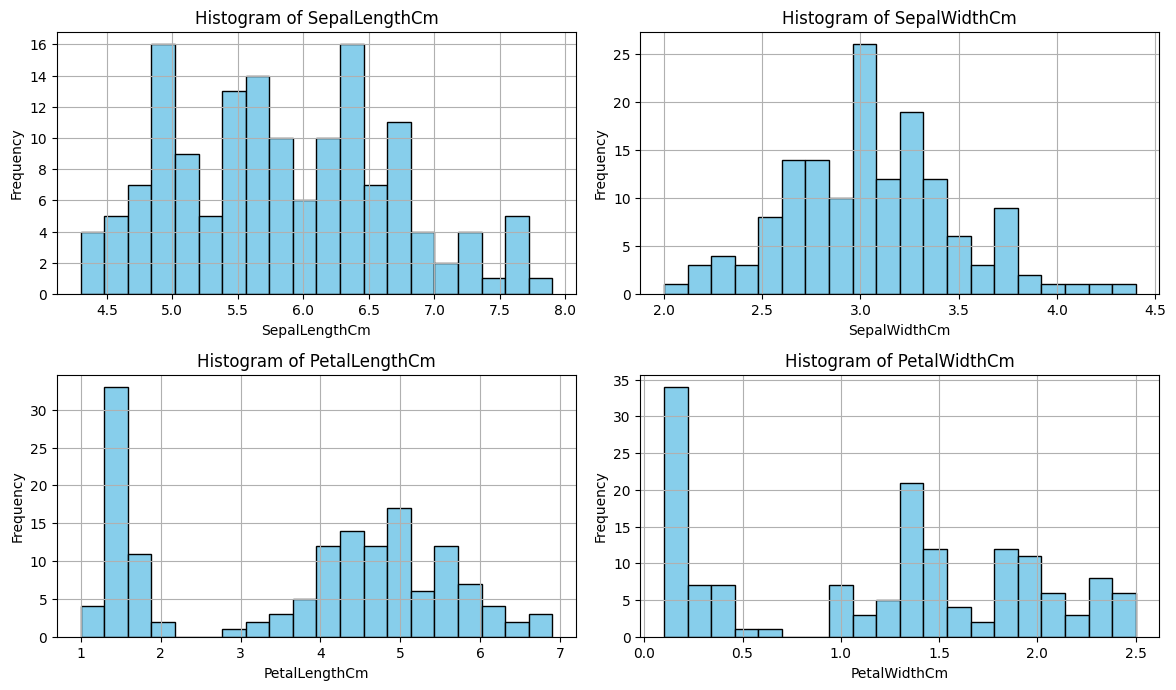

In [41]:
plt.figure(figsize=(12, 10))

# Iterate over each numerical column
for i, col in enumerate(df.select_dtypes(exclude=('object')), start=1):
    plt.subplot(3, 2, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

**`OBSERBATION:-`**

**`Sepal Length`**

    Range: 4.5 cm to 8 cm.
    Peaks at 5 cm, 5.5 cm, and 6.5 cm.
    Slightly right-skewed distribution.
**`Sepal Width`**

    Range: 2 cm to 4.5 cm.
    Roughly normal distribution with a peak around 3 cm.
    Fewer observations outside the 2.5 cm to 3.5 cm range.
**`Petal Length`**

    Range: 1 cm to 7 cm.
    Bimodal distribution with high frequencies around 1 cm and 4.5 cm to 5.5 cm.
**`Petal Width`**

    Range: 0.1 cm to 2.5 cm.
    Bimodal distribution with peaks around 0.2 cm and 1.3 cm to 1.5 cm.



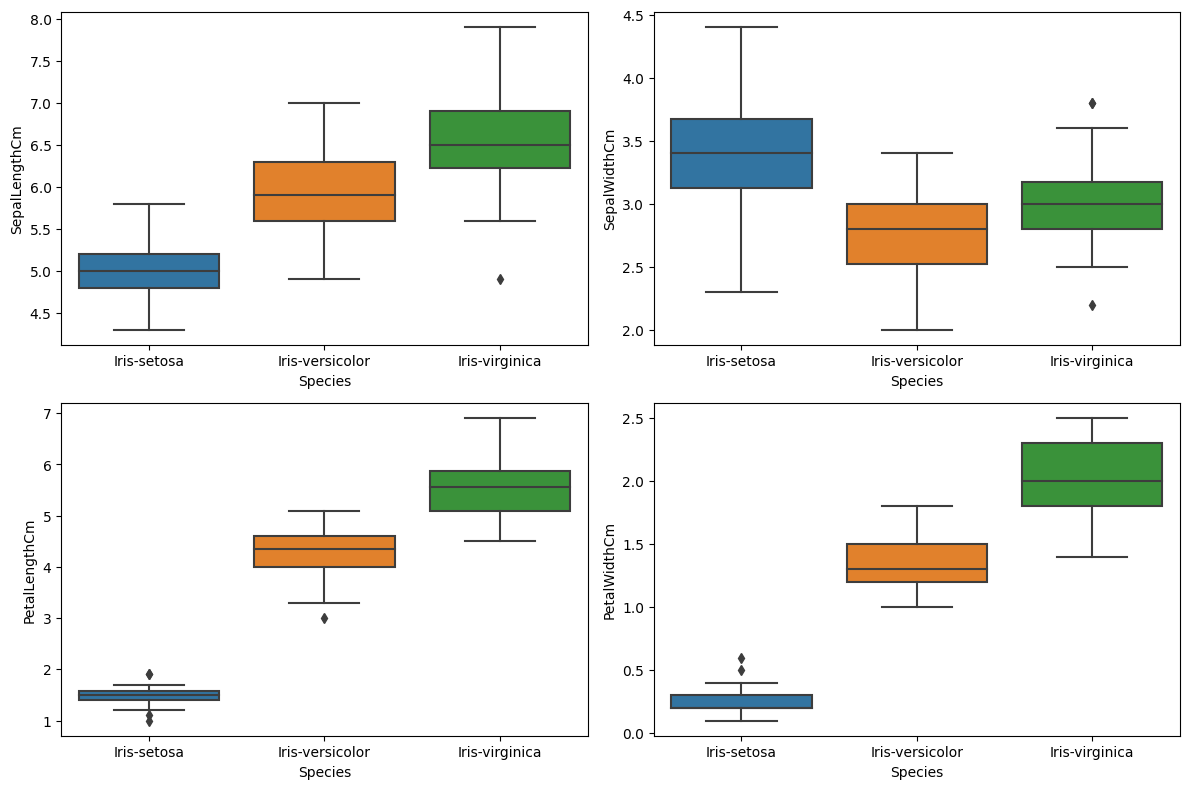

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x='Species', y='SepalLengthCm', data=df, ax=axes[0, 0])
sns.boxplot(x='Species', y='SepalWidthCm', data=df, ax=axes[0, 1])
sns.boxplot(x='Species', y='PetalLengthCm', data=df, ax=axes[1, 0])
sns.boxplot(x='Species', y='PetalWidthCm', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

**`OBSERBATION:-`**
* Iris setosa can be easily distinguished by its smaller petal length and width.
* There is more variability in sepal measurements, with some overlap between species, especially between Iris versicolor and Iris virginica.

### `RELATIONSHIPS BETWEEN FEATURES`

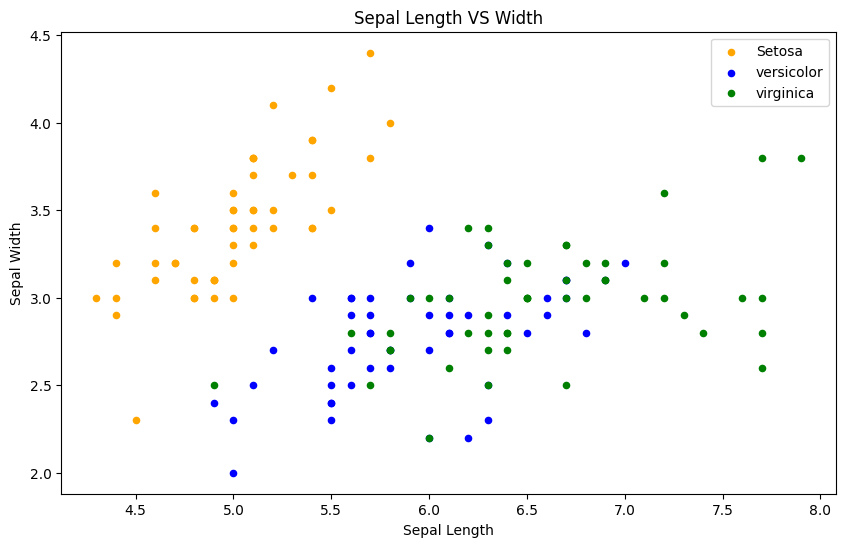

In [43]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

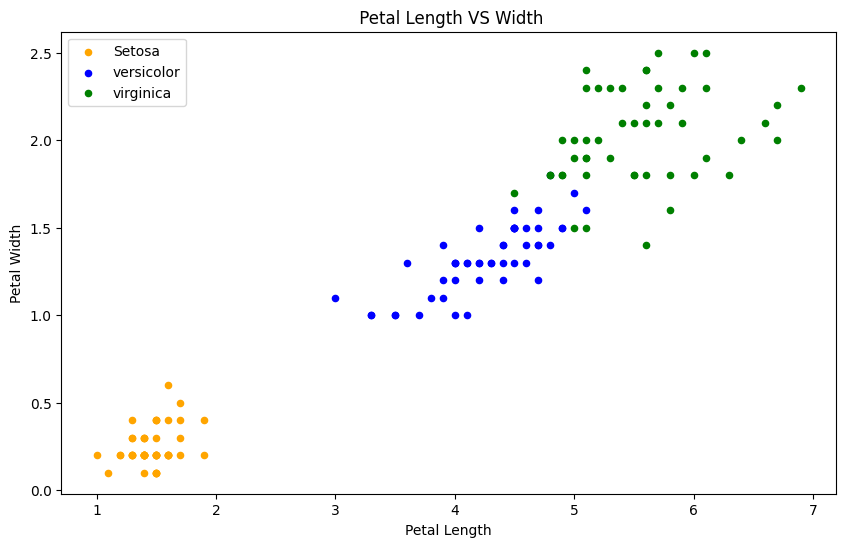

In [44]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


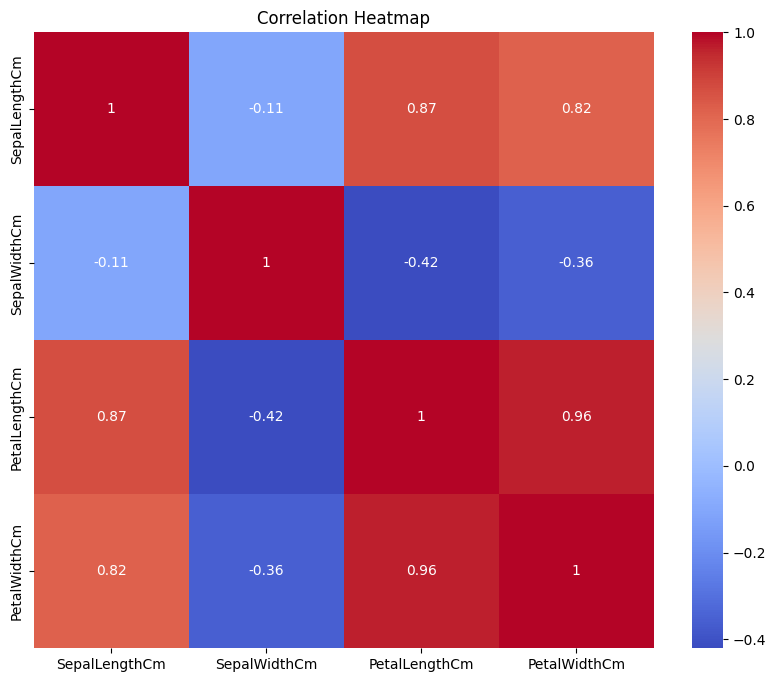

In [45]:

correlation_matrix = df.select_dtypes(exclude='object').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**`OBSERBATION:-`**
* Petal length and petal width have a strong positive correlation (0.96), indicating these features increase together.
* Sepal width has a weak negative correlation with petal length and width.


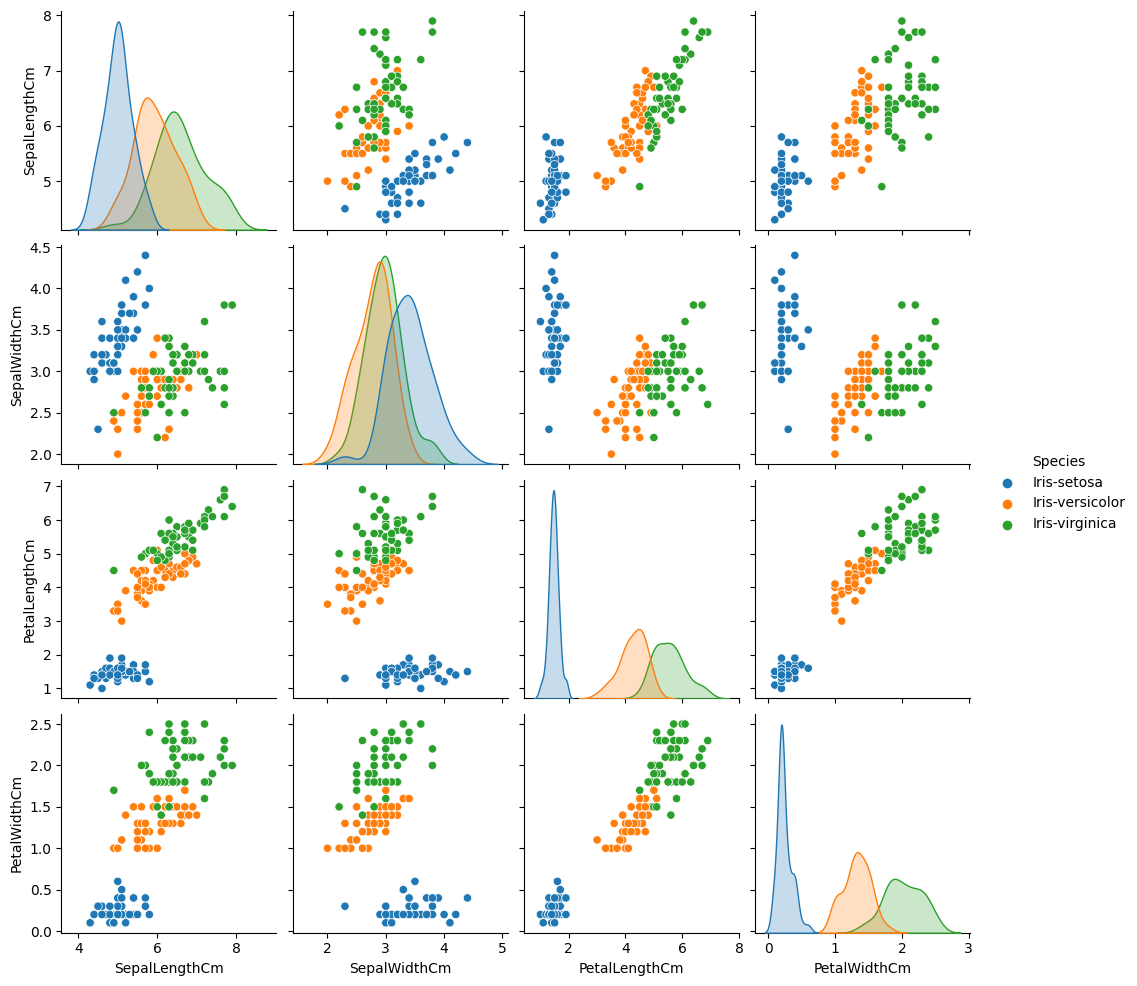

In [46]:
sns.pairplot(df, hue='Species')
plt.show()

**`OBSERBATION:-`**


    * Petal length and petal width show distinct clusters for different species, indicating their importance in classification.
    * There is some overlap in sepal length and sepal width between Iris versicolor and Iris virginica.

### `FEATURE SELECTION`

In [47]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
# all features are important to our prediction


### `DATA PREPROCESSING AND MODEL BUILDING USING MACHINE LEARNING PIPELINES`

In [49]:
X = df.drop("Species" , axis=1)
y = df['Species']

X_train ,X_test, y_train ,y_test = train_test_split(X,y,test_size=0.25 , random_state=42)

In [50]:
X.shape,y.shape

((150, 4), (150,))

In [51]:

pipelines = {
    'logistic_regression': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', LogisticRegression())
    ]),
    'sgd_classification': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', SGDClassifier())
    ]),
    'decision_tree_classification': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'random_forest_classification': Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', RandomForestClassifier())
    ])
}


param_grids = {
    'logistic_regression': [
        {
            'scaler': [RobustScaler()],
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    ],
    'sgd_classification': [
        {
            'scaler': [RobustScaler()],
            'classifier__alpha': [0.0001, 0.001, 0.01],
            'classifier__loss': ['hinge', 'log', 'modified_huber'],
            'classifier__penalty': ['l1', 'l2']
        }
    ],
    'decision_tree_classification': [
        {
            'scaler': [RobustScaler()],
            'classifier__max_depth': [None, 5, 10, 15],
            'classifier__min_samples_split': [2, 5, 10]
        }
    ],
    'random_forest_classification': [
        {
            'scaler': [RobustScaler()],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10],
            'classifier__min_samples_split': [2, 5, 10]
        }
    ]
}

best_models_classification_accuracy = {}

for algorithm in pipelines.keys():
    print("*"*10, algorithm, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algorithm], 
                               param_grid=param_grids[algorithm], 
                               cv=5, 
                               scoring='accuracy',  
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train, y_train)
    
    best_models_classification_accuracy[algorithm] = grid_search.best_estimator_
    
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    print('Training Accuracy: ', train_accuracy)
    print('Test Accuracy: ', test_accuracy)
    print('Classification Report:\n', classification_report(y_test, y_pred_test))

********** logistic_regression **********
Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 641 ms
Wall time: 1.95 s
Training Accuracy:  0.9821428571428571
Test Accuracy:  1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

********** sgd_classification **********
Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 922 ms
Wall time: 2.88 s
Training Accuracy:  0.9375
Test Accuracy:  1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00  

In [52]:
for name, model in best_models_classification_accuracy.items():
    print(f"{name}")
    print(f"{model}")
    print()

logistic_regression
Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier', LogisticRegression(C=100))])

sgd_classification
Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier',
                 SGDClassifier(loss='modified_huber', penalty='l1'))])

decision_tree_classification
Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

random_forest_classification
Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier', RandomForestClassifier(n_estimators=200))])



In [53]:
for name, model in best_models_classification_accuracy.items():
    print("_"*30)
    print("*"*10, name, "*"*10)
    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')
    
    %time y_test_pred = model.predict(X_test)
    print("Accuracy Score", accuracy_score(y_test, y_test_pred))  
    
    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")


______________________________
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 0 ns
Accuracy Score 1.0
Model Size: 1982 Bytes
______________________________
********** sgd_classification **********
CPU times: total: 0 ns
Wall time: 8.19 ms
Accuracy Score 1.0
Model Size: 2210 Bytes
______________________________
********** decision_tree_classification **********
CPU times: total: 0 ns
Wall time: 7.06 ms
Accuracy Score 1.0
Model Size: 4008 Bytes
______________________________
********** random_forest_classification **********
CPU times: total: 15.6 ms
Wall time: 25.2 ms
Accuracy Score 1.0
Model Size: 365127 Bytes


### `MACHINE LEARNING MODEL EVALUATION`

In [54]:
for name, model in best_models_classification_accuracy.items():
    print("ML MODEL EVALUATION")
    print("_"*50)
    print("*"*15, name, "*"*15)
    %time y_test_pred = model.predict(X_test)
    
    # Calculate and print classification metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

ML MODEL EVALUATION
__________________________________________________
*************** logistic_regression ***************
CPU times: total: 0 ns
Wall time: 3.46 ms
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

ML MODEL EVALUATION
__________________________________________________
*************** sgd_classification ***************
CPU times: total: 0 ns
Wall time: 0 ns
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Classification Report:
   